In [1]:
import pandas as pd
import numpy as np

import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go
from plotly.graph_objects import Bar

init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify

sns.set()

In [2]:
confirmed_data_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_data_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_data_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [3]:
confirmed_df = pd.read_csv(confirmed_data_path)
deaths_df = pd.read_csv(deaths_data_path)
recovered_df = pd.read_csv(recovered_data_path)

## Get to know the data:

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [5]:
confirmed_df.shape

(249, 70)

In [6]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
deaths_df.shape

(249, 70)

In [8]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,0,2,2,2,10,17,17,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12,32,32,32,65,65,24,65,29,29
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
recovered_df.shape

(235, 70)

#### The three datasets share the same structure, and have the same field, one for **confirmed** cases, one for **deaths** cases, and one for **recovered** cases.
#### Field descriptioin
* Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* Country/Region: country/region name conforming to WHO (will be updated).
* Lat and Long: a coordinates reference for the user.
* Date fields: M/DD/YYYY (UTC), the same data as MM-DD-YYYY.csv file.

## Data Preprocessing:

In [10]:
print(f'Confirmed dataframe shape: {confirmed_df.shape}')
print(f'Deaths dataframe shape: {deaths_df.shape}')
print(f'Recovered dataframe shape: {recovered_df.shape}')

Confirmed dataframe shape: (249, 70)
Deaths dataframe shape: (249, 70)
Recovered dataframe shape: (235, 70)


although the three datasets have the same structure, they are inconsistent, the number of **recovered** cases is different, so I think we should drop it.

@**Qusai** what do you think? (BTW, no way to mention to other users in jupyter lab, google colab has this feature :|)

### Drop irrelevant columns:
`Lat` and `Long` columns give the coordinates of the case, we won't be needing this inofrmation right now.

In [11]:
def drop_irrelevant_columns(df, irrelevant_columns):
    new_df = df.drop(columns=irrelevant_columns)
    return new_df

In [12]:
irrelevant_columns = ['Lat', 'Long']

In [13]:
confirmed_df = drop_irrelevant_columns(confirmed_df, irrelevant_columns)
deaths_df = drop_irrelevant_columns(deaths_df, irrelevant_columns)
recovered_df = drop_irrelevant_columns(recovered_df, irrelevant_columns)

In [14]:
confirmed_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [15]:
deaths_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4
1,NaN,Albania,0,0,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
recovered_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
1,NaN,Albania,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,10,17,17,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,12,32,32,32,65,65,24,65,29,29
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalize columns' names:
throughout this notebook, we will be quering columns `Province/State`, `Country/Region` a lot! so it would be better to rename them so some thing like `City` and `Country` respectively.

In [17]:
def rename_columns(df, columns_mapping):
    new_df = df.rename(columns=columns_mapping)
    return new_df

In [18]:
columns_mapping = {
    'Province/State': 'City',
    'Country/Region': 'Country'
}

In [19]:
confirmed_df = rename_columns(confirmed_df, columns_mapping)
deaths_df = rename_columns(deaths_df, columns_mapping)
recovered_df = rename_columns(recovered_df, columns_mapping)

In [20]:
confirmed_df.head()

,City,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [21]:
deaths_df.head()

,City,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4
1,NaN,Albania,0,0,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
recovered_df.head()

,City,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
1,NaN,Albania,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,10,17,17,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,12,32,32,32,65,65,24,65,29,29
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Drop `City` column
most records doesn't have `City` value, so it's better to drop it.

In [23]:
confirmed_df = drop_irrelevant_columns(confirmed_df, 'City')
deaths_df = drop_irrelevant_columns(deaths_df, 'City')
recovered_df = drop_irrelevant_columns(recovered_df, 'City')

### Aggregate data by countries:
aggregate the number of confirmed cases, number of deaths, and number of reovered cases for each country.

In [24]:
def apply_aggregation(df, by_column):
    aggregate_df = df.groupby(by=by_column)\
                        .sum()\
                        .reset_index()
    return aggregate_df

In [25]:
confirmed_stats = apply_aggregation(confirmed_df, by_column='Country')
deaths_stats = apply_aggregation(deaths_df, by_column='Country')
recovered_stats = apply_aggregation(recovered_df, by_column='Country')

In [26]:
confirmed_stats.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,Albania,0,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,Algeria,0,0,0,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,Andorra,0,0,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [27]:
deaths_stats.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4
1,Albania,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8
2,Algeria,0,0,0,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
recovered_stats.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,10,17,17,31
2,Algeria,0,0,0,0,0,0,0,0,0,...,12,32,32,32,65,65,24,65,29,29
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### create an array of `Date` columns:
the date columns will be selected for restrcuting the dataframes.

In [29]:
date_columns = [date for date in confirmed_stats.columns if date != 'Country']

In [30]:
def construct_date_df(df, column_name, value_column_name):
    date_df = pd.DataFrame(data={
        'date': column_name,
        'Country': df['Country'],
        value_column_name: df[column_name]
    })
    return date_df

In [31]:
confirmed_date_frames = [construct_date_df(confirmed_stats, date_column, 'confirmed') for date_column in date_columns]
deaths_date_frames = [construct_date_df(deaths_stats, date_column, 'deaths') for date_column in date_columns]
recovered_date_frames = [construct_date_df(recovered_stats, date_column, 'recovered') for date_column in date_columns]

In [32]:
confirmed_df = pd.concat(confirmed_date_frames)
deaths_df = pd.concat(deaths_date_frames)
recovered_df = pd.concat(recovered_date_frames)

In [33]:
confirmed_df.head()

,date,Country,confirmed
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0


In [34]:
deaths_df.head()

,date,Country,deaths
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0


In [35]:
recovered_df.head()

,date,Country,recovered
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0


### Outliers removal

in most charts, we will be interested in countries that has large values of infections, so we will keep only the `top 10` countries, and drop the rest. 

In [44]:
confirmed_stats = confirmed_df.groupby(by='Country')\
                                .agg({
                                    'confirmed': np.sum
                                })\
                                .sort_values(by='confirmed', ascending=False)\
                                .reset_index()

In [45]:
confirmed_stats.head()

,Country,confirmed
0,China,3858197
1,Italy,813397
2,US,474625
3,Spain,405473
4,Iran,367747


In [47]:
deaths_stats = deaths_df.groupby(by='Country')\
                                .agg({
                                    'deaths': np.sum
                                })\
                                .sort_values(by='deaths', ascending=False)\
                                .reset_index()

In [49]:
deaths_stats.head()

,Country,deaths
0,China,132574
1,Italy,71708
2,Spain,25614
3,Iran,23559
4,France,9859


In [50]:
recovered_stats = recovered_df.groupby(by='Country')\
                                .agg({
                                    'recovered': np.sum
                                })\
                                .sort_values(by='recovered', ascending=False)\
                                .reset_index()

In [52]:
recovered_stats.head()

,Country,recovered
0,China,2083166
1,Iran,120057
2,Italy,89953
3,Spain,39901
4,"Korea, South",33790


#### `Top 10` countries by *death rate*:

In [82]:
most_affected_countries = deaths_stats['Country'][:10]

In [83]:
print(most_affected_countries)

0             China
1             Italy
2             Spain
3              Iran
4            France
5                US
6    United Kingdom
7       Netherlands
8      Korea, South
9           Germany
Name: Country, dtype: object


In [88]:
most_deaths_df = deaths_df[deaths_df['Country'].isin(most_affected_countries)]

In [89]:
most_deaths_df.head()

,date,Country,deaths
34,1/22/20,China,17
59,1/22/20,France,0
63,1/22/20,Germany,0
78,1/22/20,Iran,0
82,1/22/20,Italy,0


In [91]:
most_infections_df = confirmed_df[confirmed_df['Country'].isin(most_affected_countries)]

In [92]:
most_infections_df.head()

,date,Country,confirmed
34,1/22/20,China,548
59,1/22/20,France,0
63,1/22/20,Germany,0
78,1/22/20,Iran,0
82,1/22/20,Italy,0


In [93]:
most_recovered_df = recovered_df[recovered_df['Country'].isin(most_affected_countries)]

In [94]:
most_recovered_df.head()

,date,Country,recovered
34,1/22/20,China,28
59,1/22/20,France,0
63,1/22/20,Germany,0
78,1/22/20,Iran,0
82,1/22/20,Italy,0


## Data Visualization:

### Line Chart:

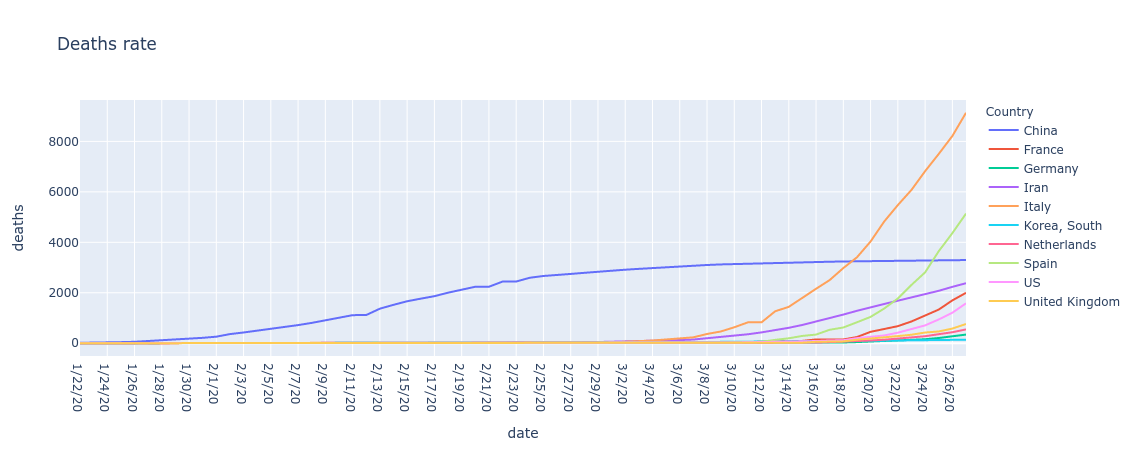

In [90]:
fig = px.line(data_frame=most_deaths_df, x='date', y='deaths', color='Country', line_group='Country', title='Deaths rate')
fig.show()

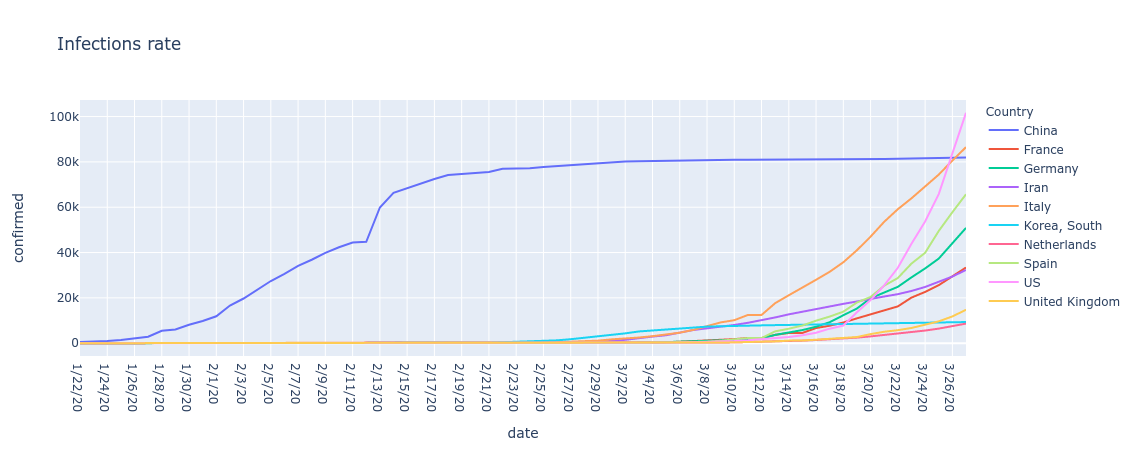

In [97]:
fig = px.line(data_frame=most_infections_df, x='date', y='confirmed', color='Country', line_group='Country', title='Infections rate')
fig.show()

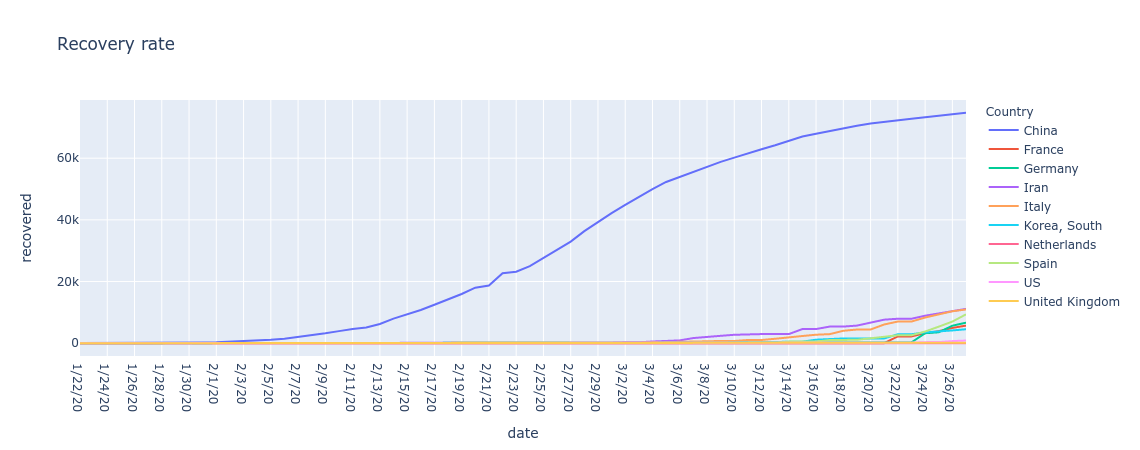

In [98]:
fig = px.line(data_frame=most_recovered_df, x='date', y='recovered', color='Country', line_group='Country', title='Recovery rate')
fig.show()

### `TODO`:
- investigate the date of the lockdown applied by each country, and study how it affected the growth of cases (in general)
- try to model the grow of countries by *Mathematical functions*, China for example is like the `sigmoid` function, while other counter countries like Italy, Spain, ... are more like `exponential` function (good resource for this: [Estimating actual COVID 19 cases (novel corona virus infections) in an area based on deaths](https://www.youtube.com/watch?v=mCa0JXEwDEk))

### Choropleth Map:

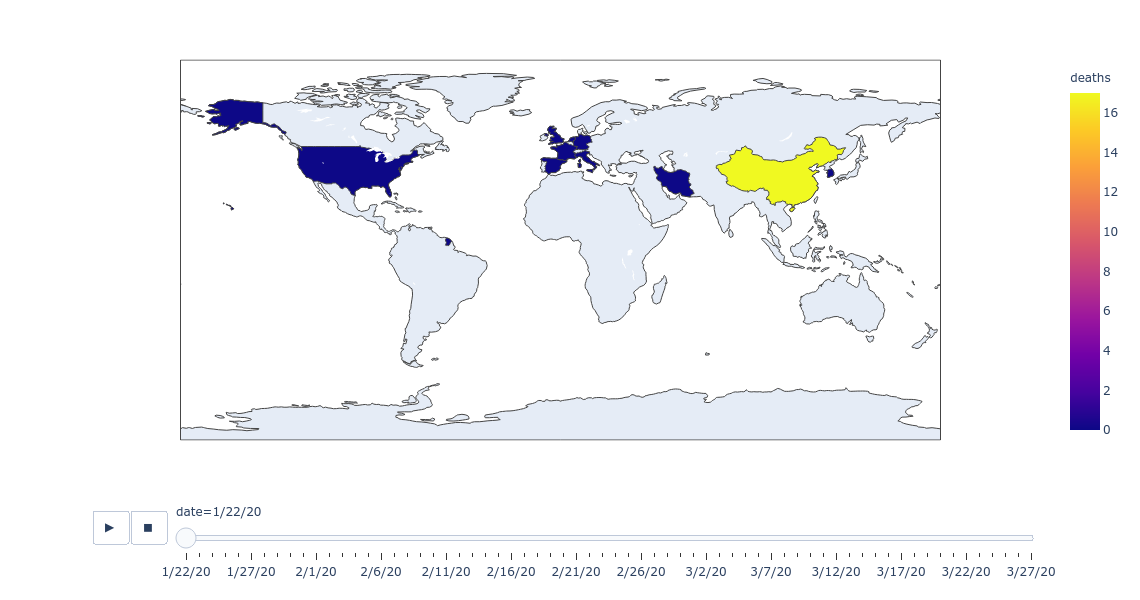

In [110]:
fig = px.choropleth(data_frame=most_deaths_df, locations='Country',
              locationmode='country names', color='deaths',
              hover_name='deaths', animation_frame='date',
              color_continuous_scale=px.colors.sequential.Plasma,
                   width=1000, height=600)
fig.show()

### Bubble chart: